<h1 style="color: #000; font-size: 24px; font-weight: bold;">IMDB dataset of movie reviews</h1>
<p style="color: #000;"><b>Understanding the problem statement is of prime importance.</b> This would help us get an intuition of what we might be dealing with. Let us see the problem statement -</p>
<p style="color: #000; font-size: 16px; font-weight: bold;">Problem Statement:</p>
<p style="color: #000;">The aim of this problem is to identify the variables which makes a good movie. To simplify, we assume that a movie is good if it has a higher meta score(a weighted average of many reviews coming from reputed critics). So, our task is to find out how to maximise meta score by finding other variables correlated to meta score.</p>
<p style="color: #000;">Formally, metascores range from 0-100, with higher scores indicating better overall reviews, with the training dataset labelled with meta scores. The objective is to predict the labels on the test dataset.</p>
<p style="color: #000;">The dataset can be found here:
<a href="https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows" style="color: #000; text-decoration: underline;"><b>https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows</b></a></p>

<style>
  .library {
    font-weight: bold;
    color: #000;
    margin-bottom: 5px;
  }
  .description {
    color: #000;
    margin-bottom: 10px;
  }
</style>

<h3 class="library">Essential Python Libraries</h3>
<p class="description">Let us begin by importing the following libraries:</p>
<ul>
  <li class="library">numpy</li>
  <li class="library">pandas</li>
  <li class="library">matplotlib</li>
  <li class="library">seaborn</li>
  <li class="library">re</li>
  <li class="library">nltk</li>
  <li class="library">string</li>
  <li class="library">warnings</li>
</ul>
<p class="description">We will also need the following libraries for specific tasks:</p>
<ul>
  <li class="library">train_test_split (from sklearn) - for splitting data into train and test</li>
  <li class="library">LinearRegression (from sklearn) - for linear regression</li>
</ul>

In [1]:
import re

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import string as str

import nltk

import warnings as warn
warn.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd 
pd.set_option("display.max_colwidth", 200)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from wordcloud import WordCloud

%matplotlib inline

<b>Reading datasets</b>

Let us read the data set using pandas.

In [2]:
odata = pd.read_csv('imdb_top_1000.csv')

Check the vital statistics of the dataset using the <b>type</b> and <b>shape</b> attributes.

In [3]:
print("Data type : ", type(odata))
print("Data dims (train): ", odata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims (train):  (1000, 16)


    Dataset has 1000 movies with 16 columns.
    
Check the variables (and their types) in the dataset using the dtypes attribute.

In [4]:
print("IMDB Dataset:")
odata.dtypes

IMDB Dataset:


Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

<b>Wordcloud of Directors and Its Impact on Meta score in IMDb</b>

By creating a wordcloud of directors, we can identify the most frequent and prominent directors in the dataset. This can help us understand which directors have a higher presence or influence in the IMDb dataset.

The impact of directors on Meta score can be <span style="font-weight:bold;">significant</span>. A highly acclaimed or renowned director may have a <span style="font-weight:bold;">positive impact</span> on the Meta score of a movie. Directors with a track record of successful and critically acclaimed movies are likely to have a higher reputation, which can influence the Meta score of their movies.

Furthermore, wordclouds can reveal patterns or trends in directorial styles or genres. For example, if a certain director is known for directing action or comedy movies, their movies may have a distinct visual or storytelling style that can impact the Meta score.

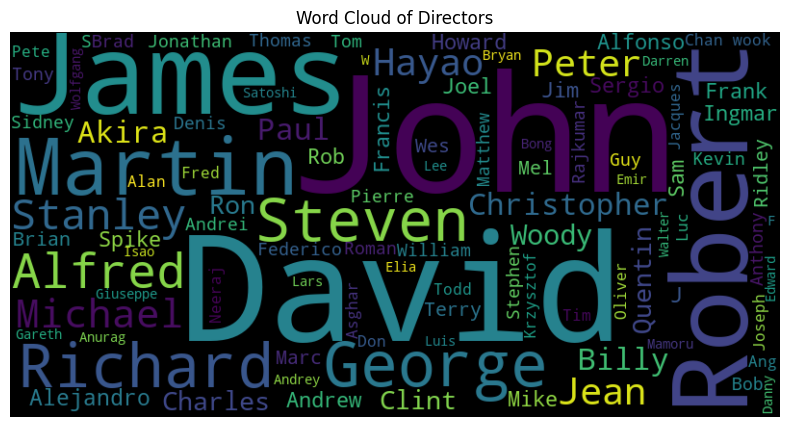

In [5]:
df = pd.read_csv(
    
    'imdb_top_1000.csv'

)

df['Director_First_Name'] = df['Director'].str.split(' ', expand=True)[0]
df['Director_Last_Name'] = df['Director'].str.split(' ', expand=True).iloc[:, -1]

# Concatenate the first and last names into a single string, handling cases where either first or last name is missing
directors_string = ''
for index, row in df.iterrows():
    first_name = row['Director_First_Name']
    last_name = row['Director_Last_Name']
    if pd.notna(first_name):
        directors_string += first_name + ' '
    if pd.notna(last_name):
        directors_string += last_name + ' '

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(directors_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Directors')
plt.show()

<b>Similarly for Genres</b>

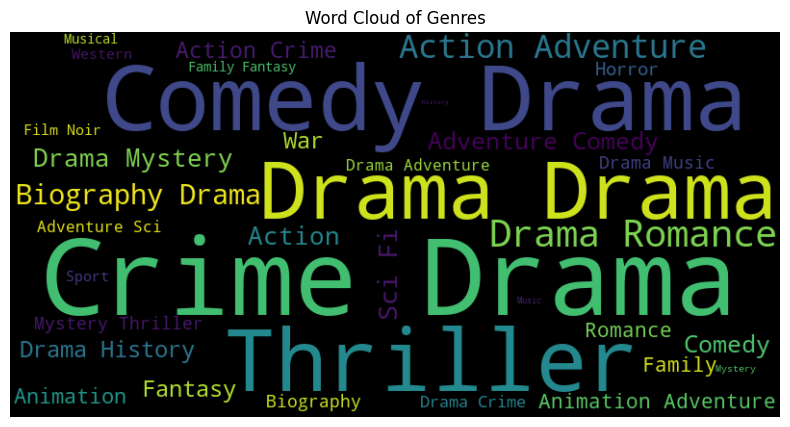

In [6]:
genres_string = ''
for index, row in df.iterrows():
    genres = row['Genre']
    if pd.notna(genres):
        genres_list = genres.split(',')
        for genre in genres_list:
            genres_string += genre.strip() + ' '

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(genres_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

<b>Data Preparation and Cleaning</b>

<b style="color:red;">Data Inspection</b>

Upon initial inspection, it seems that several columns are redundant and will be dropped.

In [7]:
df = odata.drop('Poster_Link', axis=1)
df = df.drop('Series_Title', axis=1)
df = df.drop('Released_Year', axis=1)
df = df.drop('Overview', axis=1)
df = df.drop('Genre', axis=1)
df = df.drop('Star1', axis=1)
df = df.drop('Star2', axis=1)
df = df.drop('Star3', axis=1)
df = df.drop('Star4', axis=1)
df = df.drop('Director', axis=1)

print(df)

    Certificate  Runtime  IMDB_Rating  Meta_score  No_of_Votes        Gross
0             A  142 min          9.3        80.0      2343110   28,341,469
1             A  175 min          9.2       100.0      1620367  134,966,411
2            UA  152 min          9.0        84.0      2303232  534,858,444
3             A  202 min          9.0        90.0      1129952   57,300,000
4             U   96 min          9.0        96.0       689845    4,360,000
..          ...      ...          ...         ...          ...          ...
995           A  115 min          7.6        76.0       166544          NaN
996           G  201 min          7.6        84.0        34075          NaN
997      Passed  118 min          7.6        85.0        43374   30,500,000
998         NaN   97 min          7.6        78.0        26471          NaN
999         NaN   86 min          7.6        93.0        51853          NaN

[1000 rows x 6 columns]


<b style="color:red;">Data Preparation and Cleaning</b>

It seems there are some rows with empty entries, which may not be suitable for data analysis. Therefore, we will remove those rows. Additionally, we will reindex the S/N column to start from 1 for better readability, remove "min" from the Runtime column, and remove commas from the Gross column so that we can perform linear regression later.

In [8]:
df = df.dropna()
df.index = np.arange(1, len(df) + 1)
df['Runtime'] = df['Runtime'].str.replace('min', '')
df['Gross'] = df['Gross'].str.replace(',', '')
print(df)

    Certificate Runtime  IMDB_Rating  Meta_score  No_of_Votes      Gross
1             A    142           9.3        80.0      2343110   28341469
2             A    175           9.2       100.0      1620367  134966411
3            UA    152           9.0        84.0      2303232  534858444
4             A    202           9.0        90.0      1129952   57300000
5             U     96           9.0        96.0       689845    4360000
..          ...     ...          ...         ...          ...        ...
710          PG    157           7.6        77.0        30144     696690
711          GP    144           7.6        50.0        45338    1378435
712           U     78           7.6        65.0       166409  141843612
713           U     87           7.6        96.0        40351   13780024
714      Passed    118           7.6        85.0        43374   30500000

[714 rows x 6 columns]


In [9]:
df["Meta_score"].value_counts()

76.0    30
80.0    26
84.0    25
72.0    25
90.0    24
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: Meta_score, Length: 63, dtype: int64

In [10]:
df["IMDB_Rating"].value_counts()

7.7    121
7.6    107
7.8    107
8.0     97
7.9     77
8.1     72
8.3     33
8.2     32
8.4     20
8.5     19
8.6     11
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

In [11]:
df["Runtime"].value_counts()

130     20
101     18
100     17
102     17
129     17
        ..
179      1
224      1
207      1
175      1
78       1
Name: Runtime, Length: 118, dtype: int64

In [12]:
df["No_of_Votes"].value_counts()

2343110    1
47444      1
355413     1
56235      1
88511      1
          ..
683900     1
77520      1
77554      1
176151     1
43374      1
Name: No_of_Votes, Length: 714, dtype: int64

In [13]:
df["Gross"].value_counts()

4360000      3
9600000      2
25000000     2
28341469     1
44785053     1
            ..
61649911     1
1787378      1
169659       1
305413918    1
30500000     1
Name: Gross, Length: 710, dtype: int64

In [14]:
df["Certificate"].value_counts()

U           183
A           174
UA          142
R           131
PG-13        38
PG           19
G             9
Passed        9
Approved      6
TV-PG         1
U/A           1
GP            1
Name: Certificate, dtype: int64

<b style="color:red;">Data Preparation and Cleaning</b>

As can be seen, all the variables are numerical except for the Certificate column, which is categorical. However, the Certificate column is an imbalanced categorical data type.

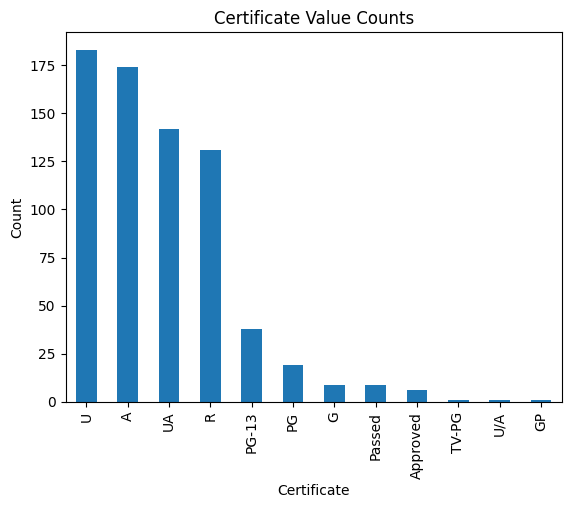

In [15]:
df["Certificate"].value_counts().plot(kind='bar')
plt.title('Certificate Value Counts')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

Hence Certificate is reclassified to Suitable for all ages and Not suitable for children

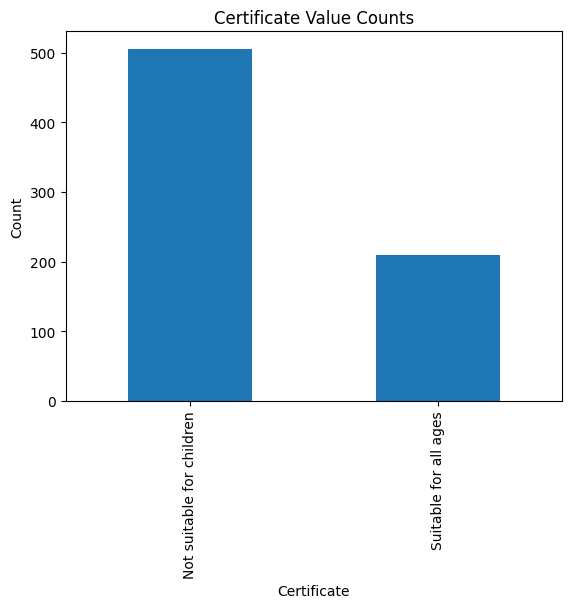

In [16]:
def reclassify_certification(cert):
    if cert in ['U', 'G', 'Approved', 'Passed', 'TV-PG', 'GP']:
        return 'Suitable for all ages'
    elif cert in ['A', 'R', 'PG-13']:
        return 'Not suitable for children'
    elif cert in ['UA', 'PG', 'U/A']:
        return 'Not suitable for children'
    else:
        return None

# Apply reclassification to 'Certificate' column
df['Certificate'] = df['Certificate'].apply(reclassify_certification)


df["Certificate"].value_counts().plot(kind='bar')
plt.title('Certificate Value Counts')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.show()

<b style="color:red;">Data Preparation and Cleaning</b>

Reclassification helps to reduce class imbalance without upscaling or downscaling.

In [17]:
print(df)

                   Certificate Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
1    Not suitable for children    142           9.3        80.0      2343110   
2    Not suitable for children    175           9.2       100.0      1620367   
3    Not suitable for children    152           9.0        84.0      2303232   
4    Not suitable for children    202           9.0        90.0      1129952   
5        Suitable for all ages     96           9.0        96.0       689845   
..                         ...     ...          ...         ...          ...   
710  Not suitable for children    157           7.6        77.0        30144   
711      Suitable for all ages    144           7.6        50.0        45338   
712      Suitable for all ages     78           7.6        65.0       166409   
713      Suitable for all ages     87           7.6        96.0        40351   
714      Suitable for all ages    118           7.6        85.0        43374   

         Gross  
1     28341469  
2    

Now we split the data into train and test sets, and display the size of the train and test sets

In [18]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

Training data size: 571
Test data size: 143


<div style="font-size: 16px; font-weight: bold;">Distribution of Meta score for Train and Test Data</div>

To assess the accuracy and similarity of the Meta score distribution between train and test data, we can create histograms to visualize the distribution.

First, we split the dataset into train and test data using a 80/20 split ratio with a random seed of 42. Next, we extract the 'Meta_score' column from both the train and test data.

The histograms allow us to visually compare the distributions of Meta scores between the train and test data. If the histograms are similar and overlapping, it indicates that the Meta score distribution is similar in both train and test data, which is desirable for accurate model evaluation. On the other hand, if the histograms are significantly different, it may suggest that the model is not performing well on unseen data.

</div>

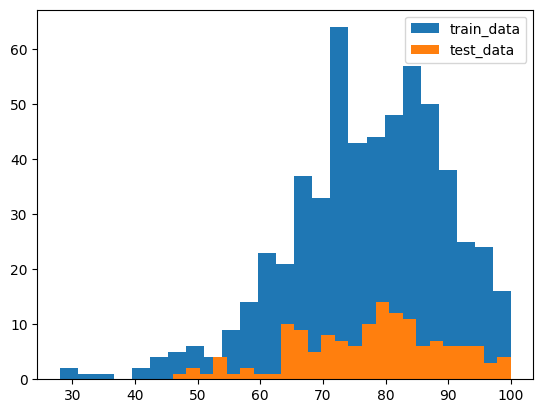

In [19]:
#distribution of METASCORE for test and train, accurate and similar
# Extract the 'metascore' column from the train and test data
train_metascore = train_data['Meta_score']
test_metascore = test_data['Meta_score']

plt.hist(train_metascore, bins=25, label="train_data")
plt.hist(test_metascore, bins=25, label="test_data")
plt.legend()
plt.show()

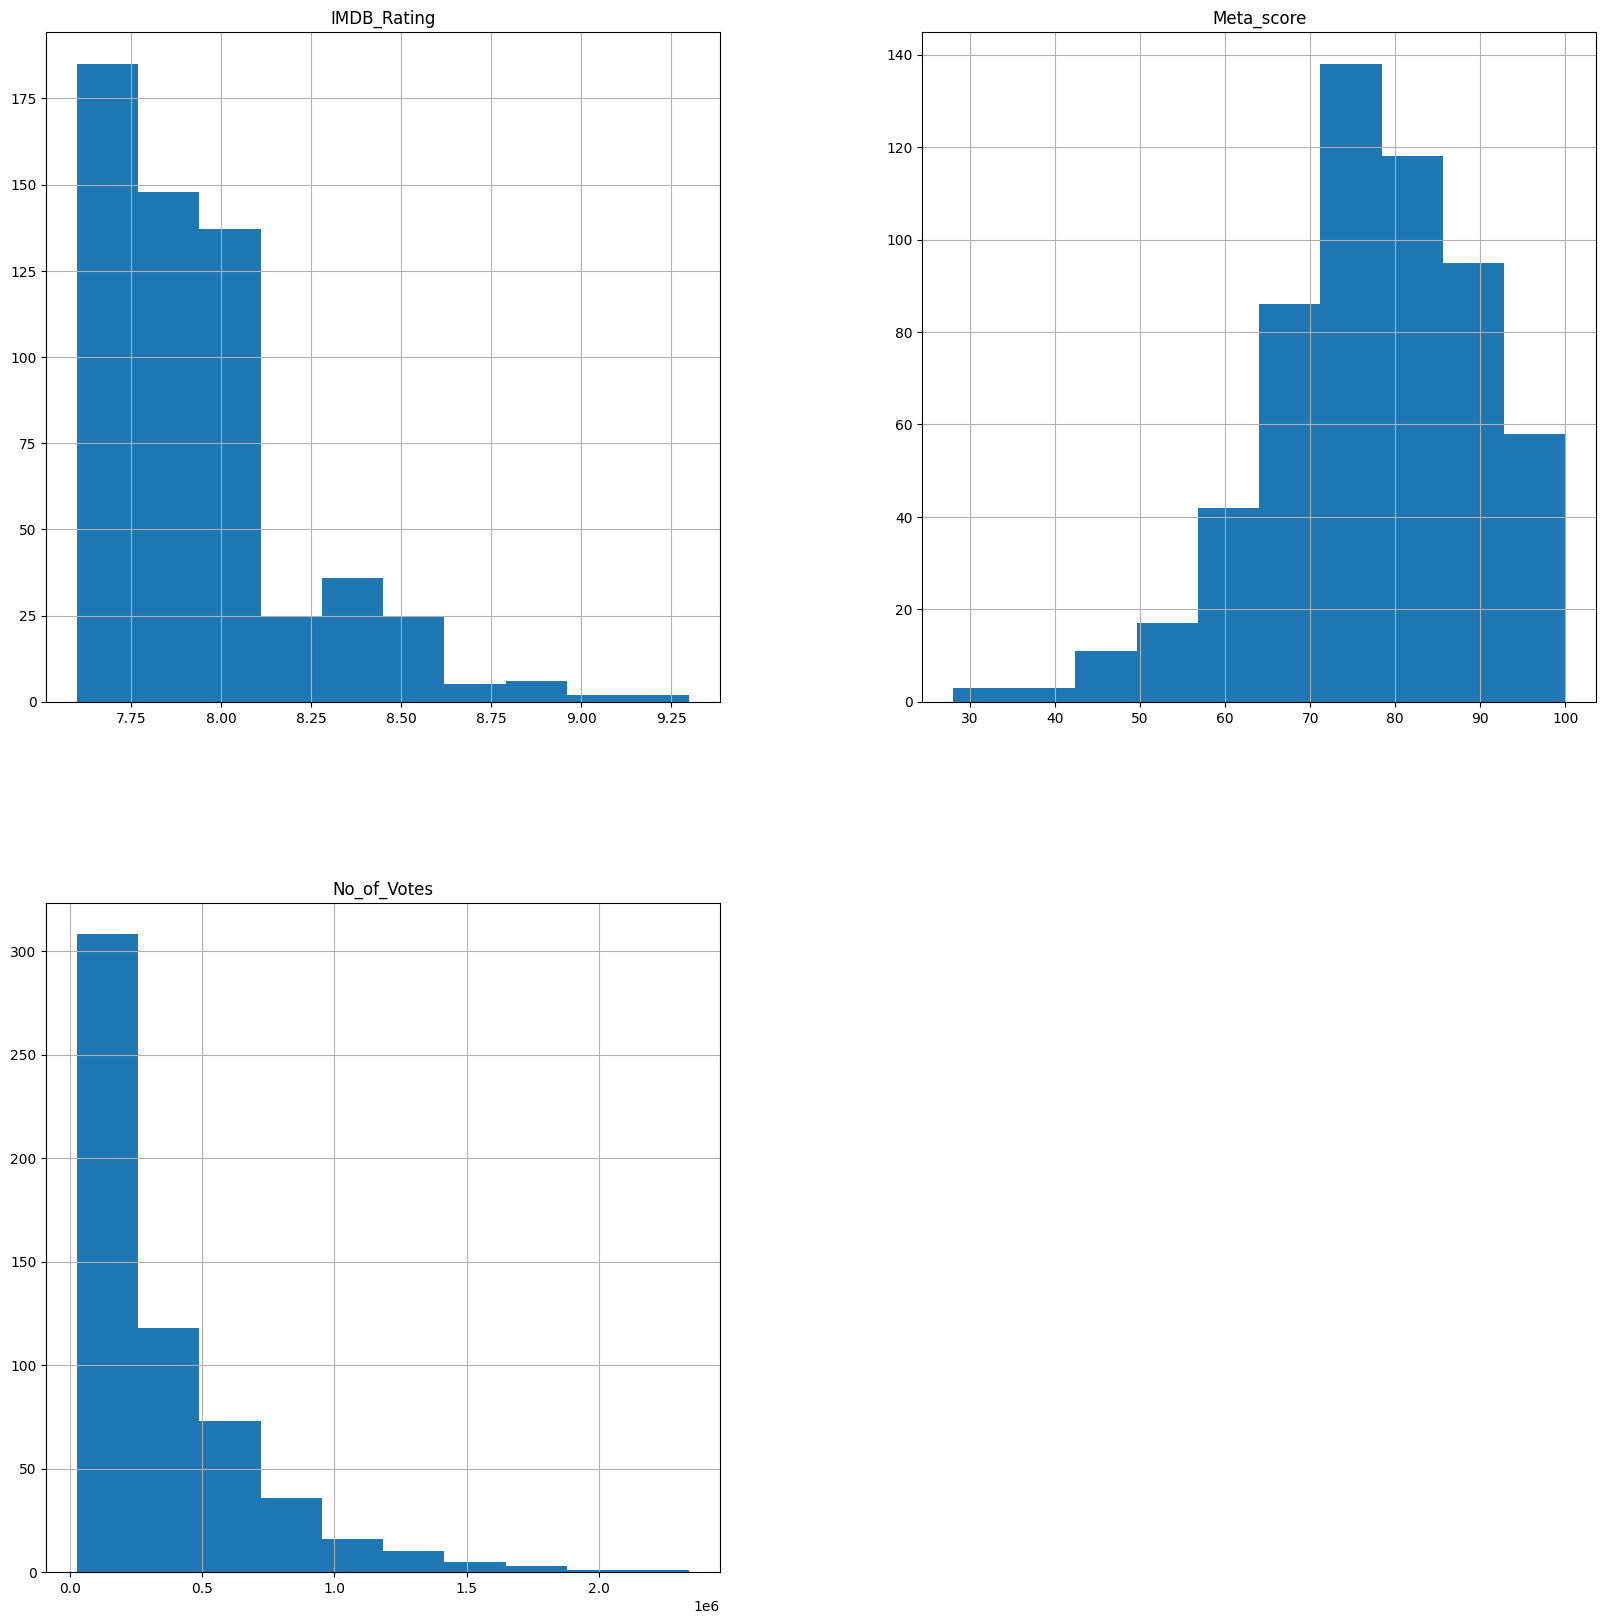

In [20]:
train_data.hist(figsize=(20,20))
plt.show()

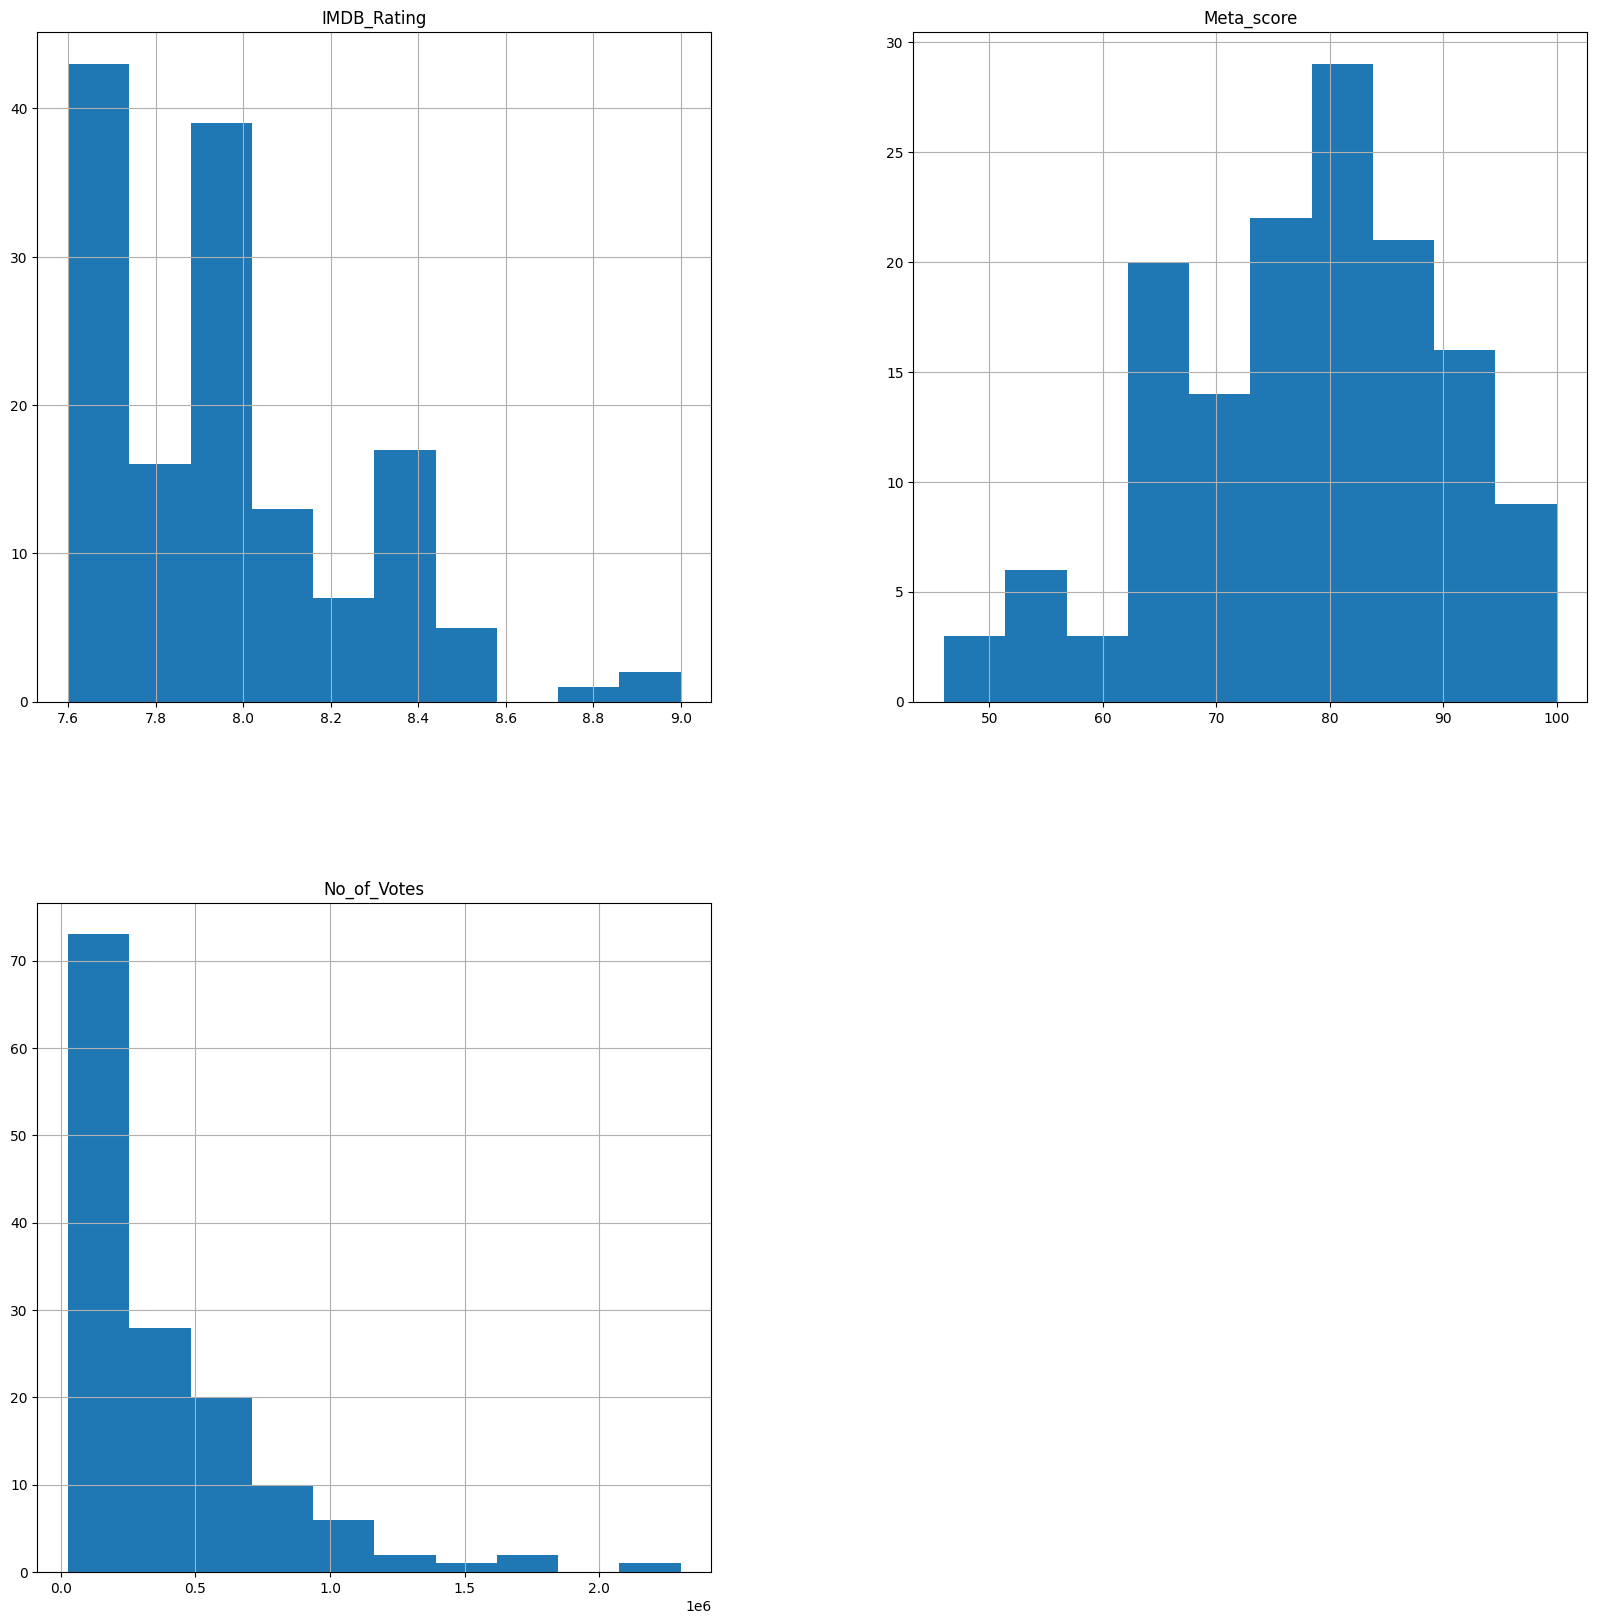

In [21]:
test_data.hist(figsize=(20,20))
plt.show()

    The overall shape of the two distributions are roughly similar. This means we have a well-distributed train-test split.

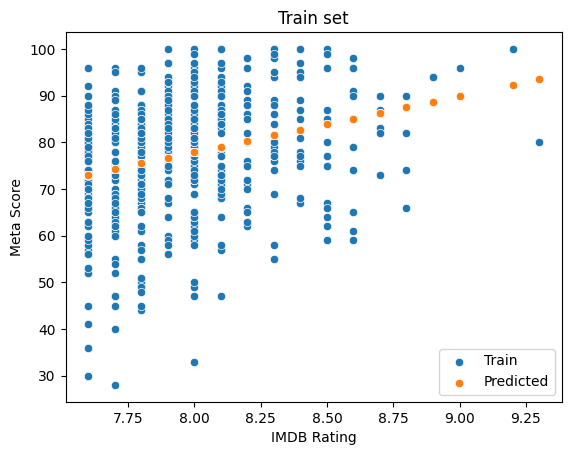

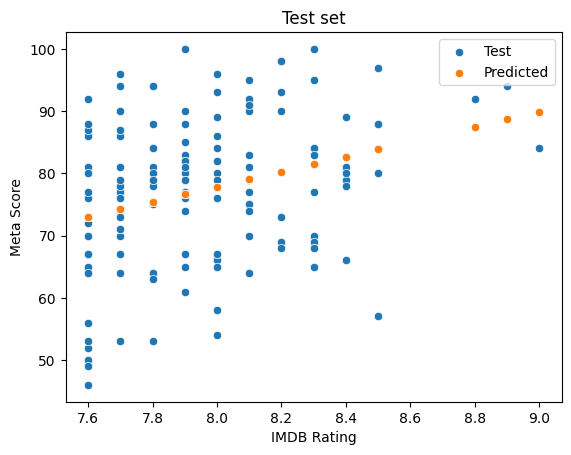

Goodness of fit (R-squared) for train set: 0.0791136271172117
Goodness of fit (R-squared) for test set: 0.07656892402803817
Classification accuracy for train set: 0.9667250437828371
Classification accuracy for test set: 0.9790209790209791
Confusion matrix for train set:
[[  0  19]
 [  0 552]]
Confusion matrix for test set:
[[  0   3]
 [  0 140]]
Classification report for train set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00        19
        True       0.97      1.00      0.98       552

    accuracy                           0.97       571
   macro avg       0.98      0.50      0.49       571
weighted avg       0.97      0.97      0.95       571

Classification report for test set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00         3
        True       0.98      1.00      0.99       140

    accuracy                           0.98       143
   macro avg       0.99      0.50 

In [22]:
X_train = train_data['IMDB_Rating'].values
y_train = train_data['Meta_score'].values

X_test = test_data['IMDB_Rating'].values
y_test = test_data['Meta_score'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Predict the meta score for the train and test sets
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Plot the scatterplots for train vs test
sns.scatterplot(x=X_train, y=y_train, label='Train')
sns.scatterplot(x=X_train, y=y_train_pred, label='Predicted')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('Train set')
plt.legend()
plt.show()

sns.scatterplot(x=X_test, y=y_test, label='Test')
sns.scatterplot(x=X_test, y=y_test_pred, label='Predicted')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.title('Test set')
plt.legend()
plt.show()

# Calculate the goodness of fit for the train and test sets
train_r2 = model.score(X_train.reshape(-1, 1), y_train)
test_r2 = model.score(X_test.reshape(-1, 1), y_test)
print("Goodness of fit (R-squared) for train set:", train_r2)
print("Goodness of fit (R-squared) for test set:", test_r2)

# Calculate the classification accuracy for the train and test sets
train_acc = accuracy_score(y_train > 50, y_train_pred > 50)
test_acc = accuracy_score(y_test > 50, y_test_pred > 50)
print("Classification accuracy for train set:", train_acc)
print("Classification accuracy for test set:", test_acc)

# Calculate the confusion matrix for the train and test sets
train_cm = confusion_matrix(y_train > 50, y_train_pred > 50)
test_cm = confusion_matrix(y_test > 50, y_test_pred > 50)
print("Confusion matrix for train set:")
print(train_cm)
print("Confusion matrix for test set:")
print(test_cm)

# Calculate the classification report for the train and test sets
train_cr = classification_report(y_train > 50, y_train_pred > 50, zero_division=1)
test_cr = classification_report(y_test > 50, y_test_pred > 50, zero_division=1)
print("Classification report for train set:")
print(train_cr)
print("Classification report for test set:")
print(test_cr)

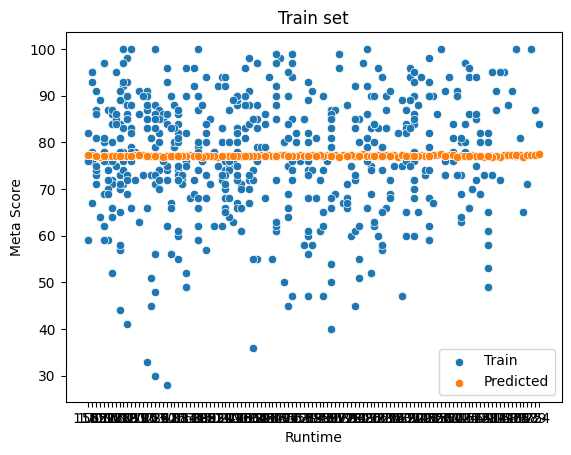

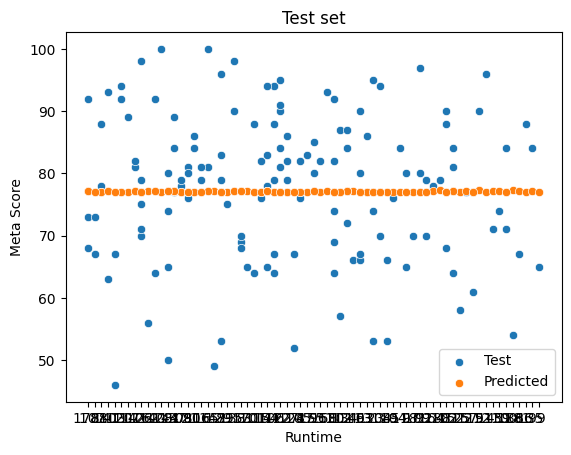

Goodness of fit (R-squared) for train set: 4.447830989828816e-05
Goodness of fit (R-squared) for test set: -0.0025402241067127296
Classification accuracy for train set: 0.9667250437828371
Classification accuracy for test set: 0.9790209790209791
Confusion matrix for train set:
[[  0  19]
 [  0 552]]
Confusion matrix for test set:
[[  0   3]
 [  0 140]]
Classification report for train set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00        19
        True       0.97      1.00      0.98       552

    accuracy                           0.97       571
   macro avg       0.98      0.50      0.49       571
weighted avg       0.97      0.97      0.95       571

Classification report for test set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00         3
        True       0.98      1.00      0.99       140

    accuracy                           0.98       143
   macro avg       0.99     

In [23]:
X_train = train_data['Runtime'].values
y_train = train_data['Meta_score'].values

X_test = test_data['Runtime'].values
y_test = test_data['Meta_score'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Predict the meta score for the train and test sets
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Plot the scatterplots for train vs test
sns.scatterplot(x=X_train, y=y_train, label='Train')
sns.scatterplot(x=X_train, y=y_train_pred, label='Predicted')
plt.xlabel('Runtime')
plt.ylabel('Meta Score')
plt.title('Train set')
plt.legend()
plt.show()

sns.scatterplot(x=X_test, y=y_test, label='Test')
sns.scatterplot(x=X_test, y=y_test_pred, label='Predicted')
plt.xlabel('Runtime')
plt.ylabel('Meta Score')
plt.title('Test set')
plt.legend()
plt.show()

# Calculate the goodness of fit for the train and test sets
train_r2 = model.score(X_train.reshape(-1, 1), y_train)
test_r2 = model.score(X_test.reshape(-1, 1), y_test)
print("Goodness of fit (R-squared) for train set:", train_r2)
print("Goodness of fit (R-squared) for test set:", test_r2)

# Calculate the classification accuracy for the train and test sets
train_acc = accuracy_score(y_train > 50, y_train_pred > 50)
test_acc = accuracy_score(y_test > 50, y_test_pred > 50)
print("Classification accuracy for train set:", train_acc)
print("Classification accuracy for test set:", test_acc)

# Calculate the confusion matrix for the train and test sets
train_cm = confusion_matrix(y_train > 50, y_train_pred > 50)
test_cm = confusion_matrix(y_test > 50, y_test_pred > 50)
print("Confusion matrix for train set:")
print(train_cm)
print("Confusion matrix for test set:")
print(test_cm)

# Calculate the classification report for the train and test sets
train_cr = classification_report(y_train > 50, y_train_pred > 50, zero_division=1)
test_cr = classification_report(y_test > 50, y_test_pred > 50, zero_division=1)
print("Classification report for train set:")
print(train_cr)
print("Classification report for test set:")
print(test_cr)

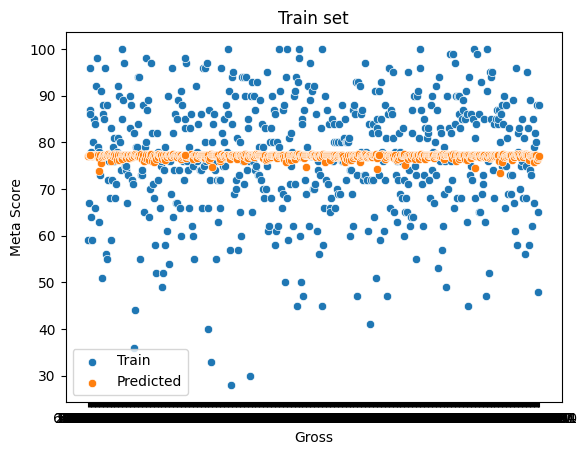

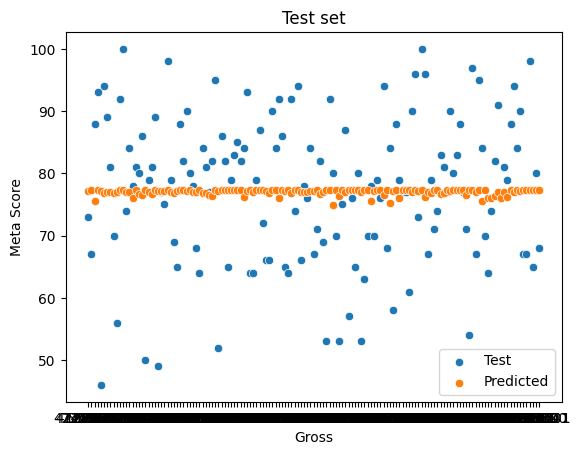

Goodness of fit (R-squared) for train set: 0.001433262276697822
Goodness of fit (R-squared) for test set: -0.01005997823519289
Classification accuracy for train set: 0.9667250437828371
Classification accuracy for test set: 0.9790209790209791
Confusion matrix for train set:
[[  0  19]
 [  0 552]]
Confusion matrix for test set:
[[  0   3]
 [  0 140]]
Classification report for train set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00        19
        True       0.97      1.00      0.98       552

    accuracy                           0.97       571
   macro avg       0.98      0.50      0.49       571
weighted avg       0.97      0.97      0.95       571

Classification report for test set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00         3
        True       0.98      1.00      0.99       140

    accuracy                           0.98       143
   macro avg       0.99      0.

In [24]:
X_train = train_data['Gross'].values
y_train = train_data['Meta_score'].values

X_test = test_data['Gross'].values
y_test = test_data['Meta_score'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Predict the meta score for the train and test sets
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Plot the scatterplots for train vs test
sns.scatterplot(x=X_train, y=y_train, label='Train')
sns.scatterplot(x=X_train, y=y_train_pred, label='Predicted')
plt.xlabel('Gross')
plt.ylabel('Meta Score')
plt.title('Train set')
plt.legend()
plt.show()

sns.scatterplot(x=X_test, y=y_test, label='Test')
sns.scatterplot(x=X_test, y=y_test_pred, label='Predicted')
plt.xlabel('Gross')
plt.ylabel('Meta Score')
plt.title('Test set')
plt.legend()
plt.show()

# Calculate the goodness of fit for the train and test sets
train_r2 = model.score(X_train.reshape(-1, 1), y_train)
test_r2 = model.score(X_test.reshape(-1, 1), y_test)
print("Goodness of fit (R-squared) for train set:", train_r2)
print("Goodness of fit (R-squared) for test set:", test_r2)

# Calculate the classification accuracy for the train and test sets
train_acc = accuracy_score(y_train > 50, y_train_pred > 50)
test_acc = accuracy_score(y_test > 50, y_test_pred > 50)
print("Classification accuracy for train set:", train_acc)
print("Classification accuracy for test set:", test_acc)

# Calculate the confusion matrix for the train and test sets
train_cm = confusion_matrix(y_train > 50, y_train_pred > 50)
test_cm = confusion_matrix(y_test > 50, y_test_pred > 50)
print("Confusion matrix for train set:")
print(train_cm)
print("Confusion matrix for test set:")
print(test_cm)

# Calculate the classification report for the train and test sets
train_cr = classification_report(y_train > 50, y_train_pred > 50, zero_division=1)
test_cr = classification_report(y_test > 50, y_test_pred > 50, zero_division=1)
print("Classification report for train set:")
print(train_cr)
print("Classification report for test set:")
print(test_cr)

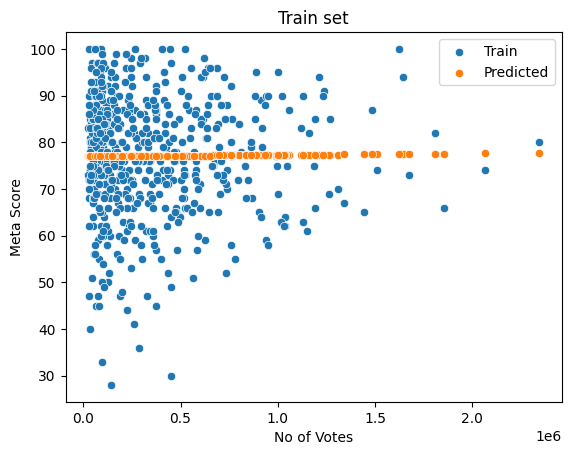

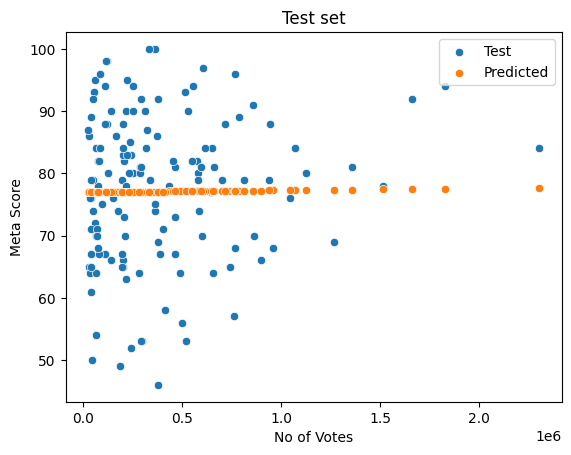

Goodness of fit (R-squared) for train set: 7.982623148439227e-05
Goodness of fit (R-squared) for test set: 0.0005308411015486625
Classification accuracy for train set: 0.9667250437828371
Classification accuracy for test set: 0.9790209790209791
Confusion matrix for train set:
[[  0  19]
 [  0 552]]
Confusion matrix for test set:
[[  0   3]
 [  0 140]]
Classification report for train set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00        19
        True       0.97      1.00      0.98       552

    accuracy                           0.97       571
   macro avg       0.98      0.50      0.49       571
weighted avg       0.97      0.97      0.95       571

Classification report for test set:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00         3
        True       0.98      1.00      0.99       140

    accuracy                           0.98       143
   macro avg       0.99      

In [25]:
X_train = train_data['No_of_Votes'].values
y_train = train_data['Meta_score'].values

X_test = test_data['No_of_Votes'].values
y_test = test_data['Meta_score'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Predict the meta score for the train and test sets
y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Plot the scatterplots for train vs test
sns.scatterplot(x=X_train, y=y_train, label='Train')
sns.scatterplot(x=X_train, y=y_train_pred, label='Predicted')
plt.xlabel('No of Votes')
plt.ylabel('Meta Score')
plt.title('Train set')
plt.legend()
plt.show()

sns.scatterplot(x=X_test, y=y_test, label='Test')
sns.scatterplot(x=X_test, y=y_test_pred, label='Predicted')
plt.xlabel('No of Votes')
plt.ylabel('Meta Score')
plt.title('Test set')
plt.legend()
plt.show()

# Calculate the goodness of fit for the train and test sets
train_r2 = model.score(X_train.reshape(-1, 1), y_train)
test_r2 = model.score(X_test.reshape(-1, 1), y_test)
print("Goodness of fit (R-squared) for train set:", train_r2)
print("Goodness of fit (R-squared) for test set:", test_r2)

# Calculate the classification accuracy for the train and test sets
train_acc = accuracy_score(y_train > 50, y_train_pred > 50)
test_acc = accuracy_score(y_test > 50, y_test_pred > 50)
print("Classification accuracy for train set:", train_acc)
print("Classification accuracy for test set:", test_acc)

# Calculate the confusion matrix for the train and test sets
train_cm = confusion_matrix(y_train > 50, y_train_pred > 50)
test_cm = confusion_matrix(y_test > 50, y_test_pred > 50)
print("Confusion matrix for train set:")
print(train_cm)
print("Confusion matrix for test set:")
print(test_cm)

# Calculate the classification report for the train and test sets
train_cr = classification_report(y_train > 50, y_train_pred > 50, zero_division=1)
test_cr = classification_report(y_test > 50, y_test_pred > 50, zero_division=1)
print("Classification report for train set:")
print(train_cr)
print("Classification report for test set:")
print(test_cr)

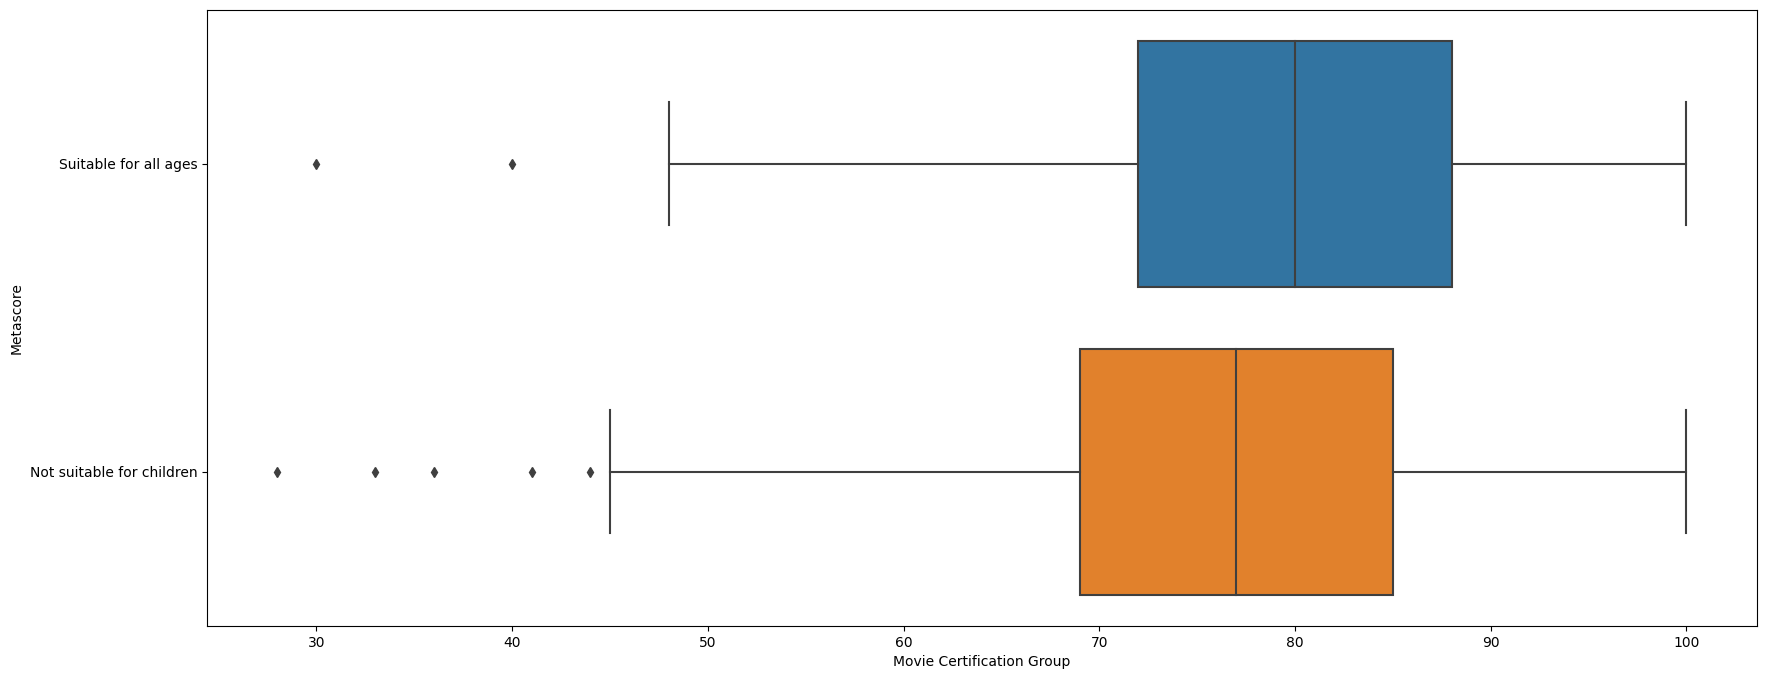

In [26]:
order = ['Suitable for all ages', 'Not suitable for children']

# Create box plot using Seaborn
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, y='Certificate', x='Meta_score', order=order, orient='h')
plt.xlabel('Movie Certification Group')
plt.ylabel('Metascore')
plt.show()

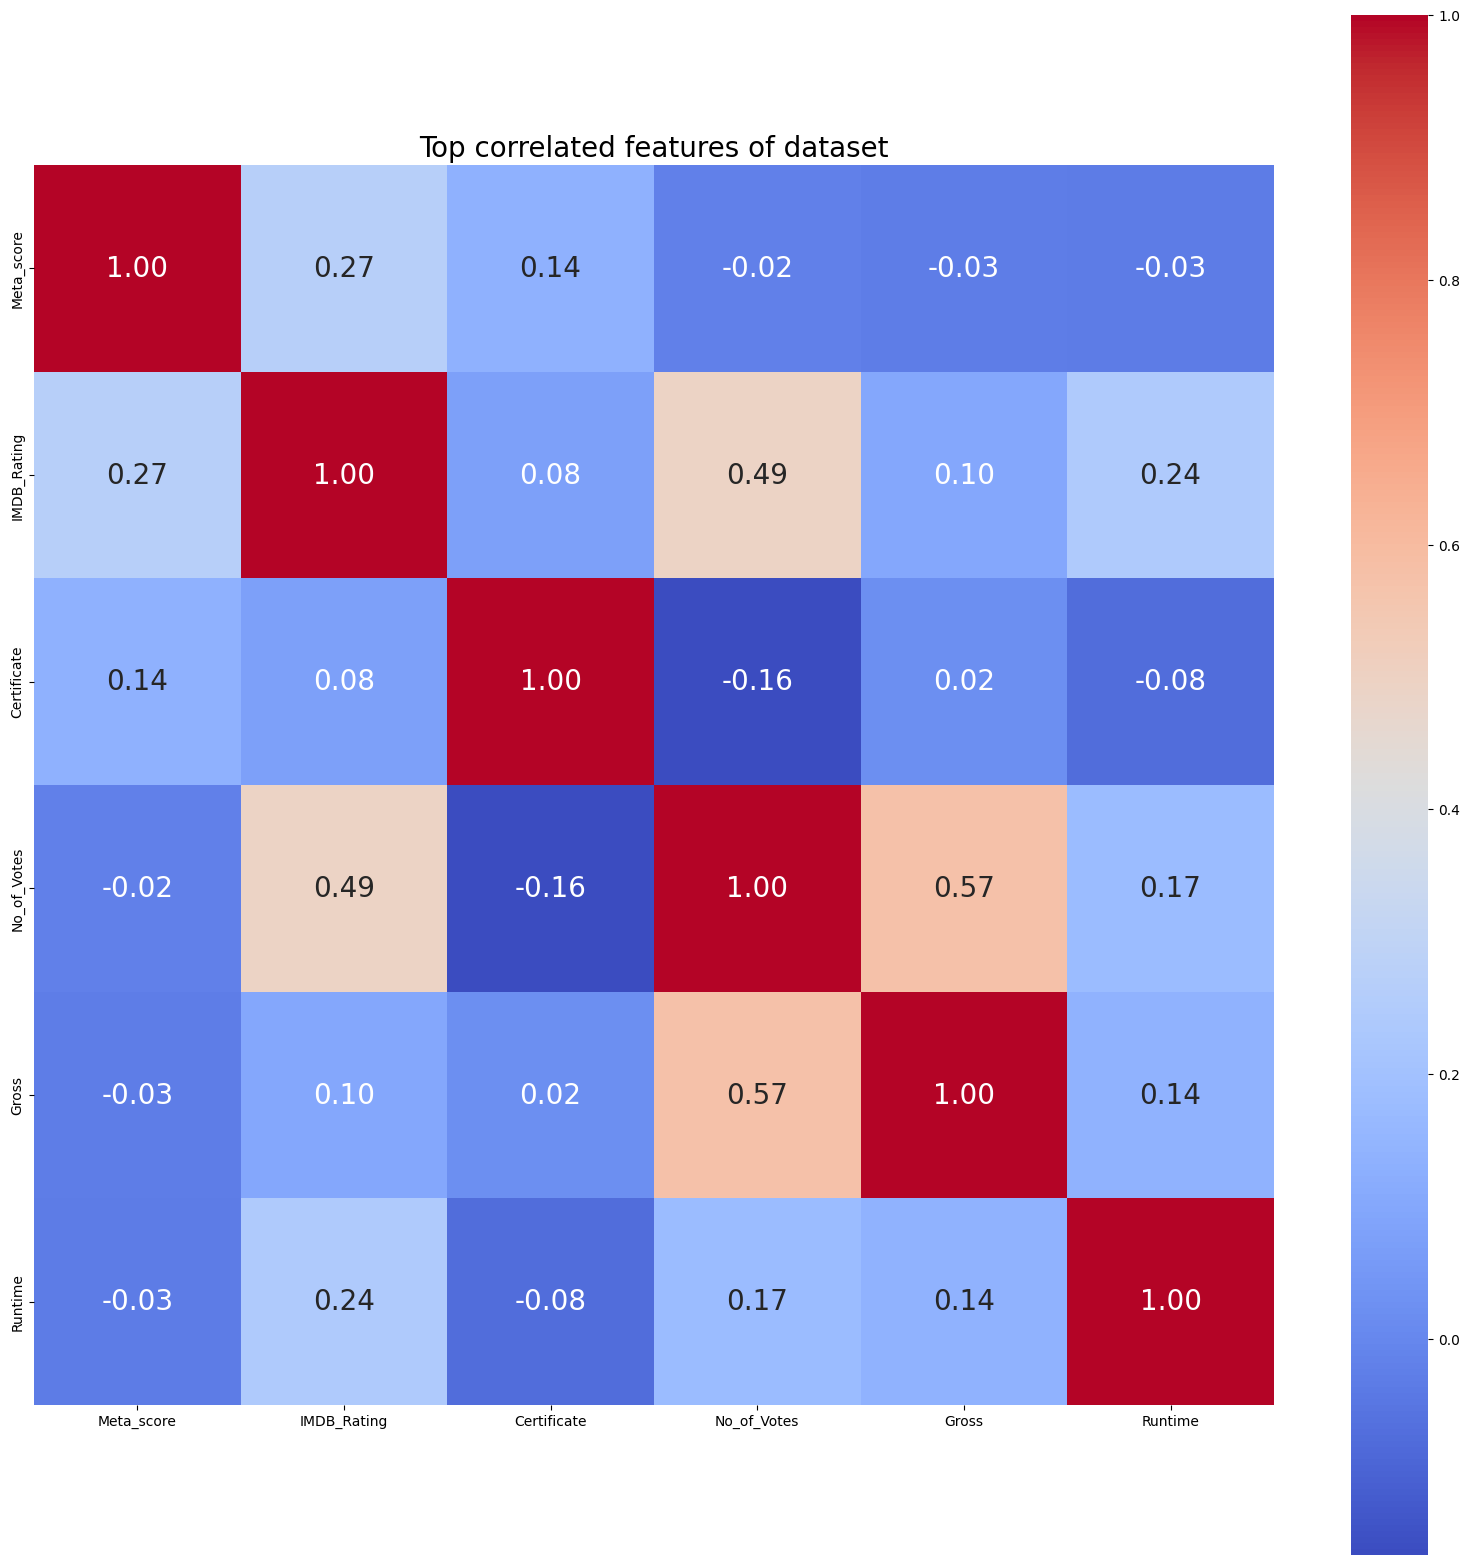

In [28]:
df = pd.read_csv(
    
    'imdb_top_1000.csv'

)

df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

def reclassify_certification(cert):
    if cert in ['U', 'G', 'Approved', 'Passed', 'TV-PG']:
        return 1
    elif cert in ['A', 'R', 'PG-13']:
        return 0
    elif cert in ['UA', 'PG', 'U/A']:
        return 0
    else:
        return None

# Apply reclassification to 'Certificate' column
df['Certificate'] = df['Certificate'].apply(reclassify_certification)

top = 6
corr = df.corr(numeric_only=True)
top15 = corr.nlargest(top, 'Meta_score')['Meta_score'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':20})
plt.title('Top correlated features of dataset', size=20)
plt.show()

<b style="color:red;">Conclusion:</b>

IMDB rating seems to have the highest correlation to Meta score with a positive Goodness of fit (R-squared) which high for both train and test set, as well as a very high Classification accuracy for train and test set(above 0.96 for both). Hence it indicates IMDB rating has a positive correlation with Meta score

There is a small increase, as seen in the box plot, in Meta score when movies are suitable for all ages compared to movies which are not suitable for children. Hence Certificate has a small correlation to meta score.

Unfortunately exploratory data analysis and linear regression has proven that the other 3 variables, Runtime, No. of votes and Gross, which may intuitively seem to be related are actually in fact not correlated to Meta score, as their Goodness of fit is very close to 0 indicating there is likely neither positive nor negative correlation between them.

There may be other factors which affects Meta score but were not included in the data set, such as Budget as higher budget films may be expected to deliver more impressive visuals and effects, or Box Office as box office success can indicate a widespread appeal.